In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings('ignore')


In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [54]:
print("Train set dimension: ", x_train.shape, y_train.shape)


Train set dimension:  (60000, 28, 28) (60000,)


In [55]:
print("Test set dimension: ", x_test.shape, y_test.shape)

Test set dimension:  (10000, 28, 28) (10000,)


In [56]:
num_labels = len(np.unique(y_train))

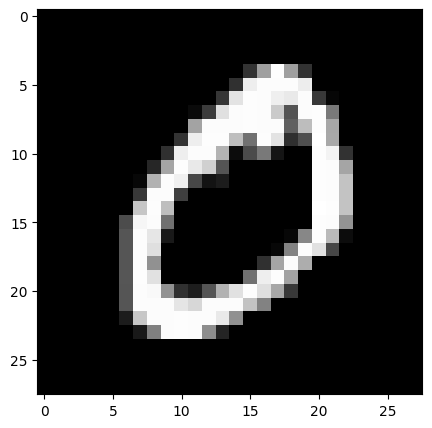

In [57]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[1], cmap='gray')
plt.show()

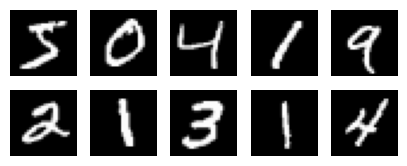

In [58]:
plt.figure(figsize=(5,5))
for n in range(10):
  ax = plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap='gray')
  #plt.title(y_train[n])
  plt.axis('off')

In [59]:
def visualize_img(data, datasize: int):
  plt.figure(figsize=(5,5))
  for n in range(datasize):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(x_train[n], cmap='gray')
    #plt.title(y_train[n])
    plt.axis('off')

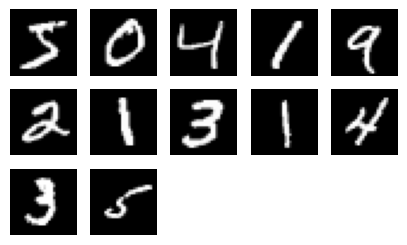

In [60]:
visualize_img(x_train, datasize=12)

In [61]:
# RGB(RedGreenBlue, range--> 0-255)
# r:250 g:0 b:250
# white RBG:255
# black RGB:0

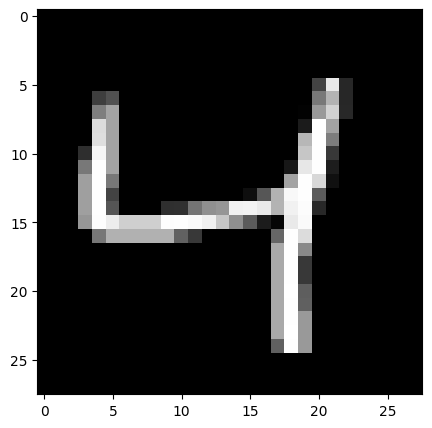

In [62]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[2], cmap='gray')
plt.show()

In [63]:
x_train[3].shape

(28, 28)

In [64]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  96, 244, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 127, 251, 251, 253,  62,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  68, 236, 251, 211,  31,   8,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  60, 228, 251, 251,  94,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 155, 253, 253, 189,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  20, 253, 251, 235,  66,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         32, 205, 253, 251, 126,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        104, 251, 253, 184,  15,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  80,
        240, 251, 193,  23,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 253,
        253, 253, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 151, 251,
        251, 251,  39,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 221, 251,
        251, 172,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 234, 251, 251,
        196,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 253, 251, 251,
         89,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 159, 255, 253, 253,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  48, 228, 253, 247, 140,
          8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  64, 251, 253, 220,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [65]:
x_train[3][10,10]

np.uint8(0)

In [66]:
x_train[3][16,18]

np.uint8(0)

In [67]:
x_train[3].mean()

np.float64(21.855867346938776)

In [68]:
x_train[3][14:20, 10:20]

array([[  0,   0,  80, 240, 251, 193,  23,   0,   0,   0],
       [  0,  32, 253, 253, 253, 159,   0,   0,   0,   0],
       [  0, 151, 251, 251, 251,  39,   0,   0,   0,   0],
       [ 48, 221, 251, 251, 172,   0,   0,   0,   0,   0],
       [234, 251, 251, 196,  12,   0,   0,   0,   0,   0],
       [253, 251, 251,  89,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [69]:
x_train[3][14:20, 10:20].mean()

np.float64(90.18333333333334)

In [70]:
def pixel_visualize(img):
    fig = plt.figure(figsize=(24,24))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')
    width, height = img.shape

    threshold = img.max() / 2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy=(y, x),
                        color='white' if img[x][y] < threshold else 'black')


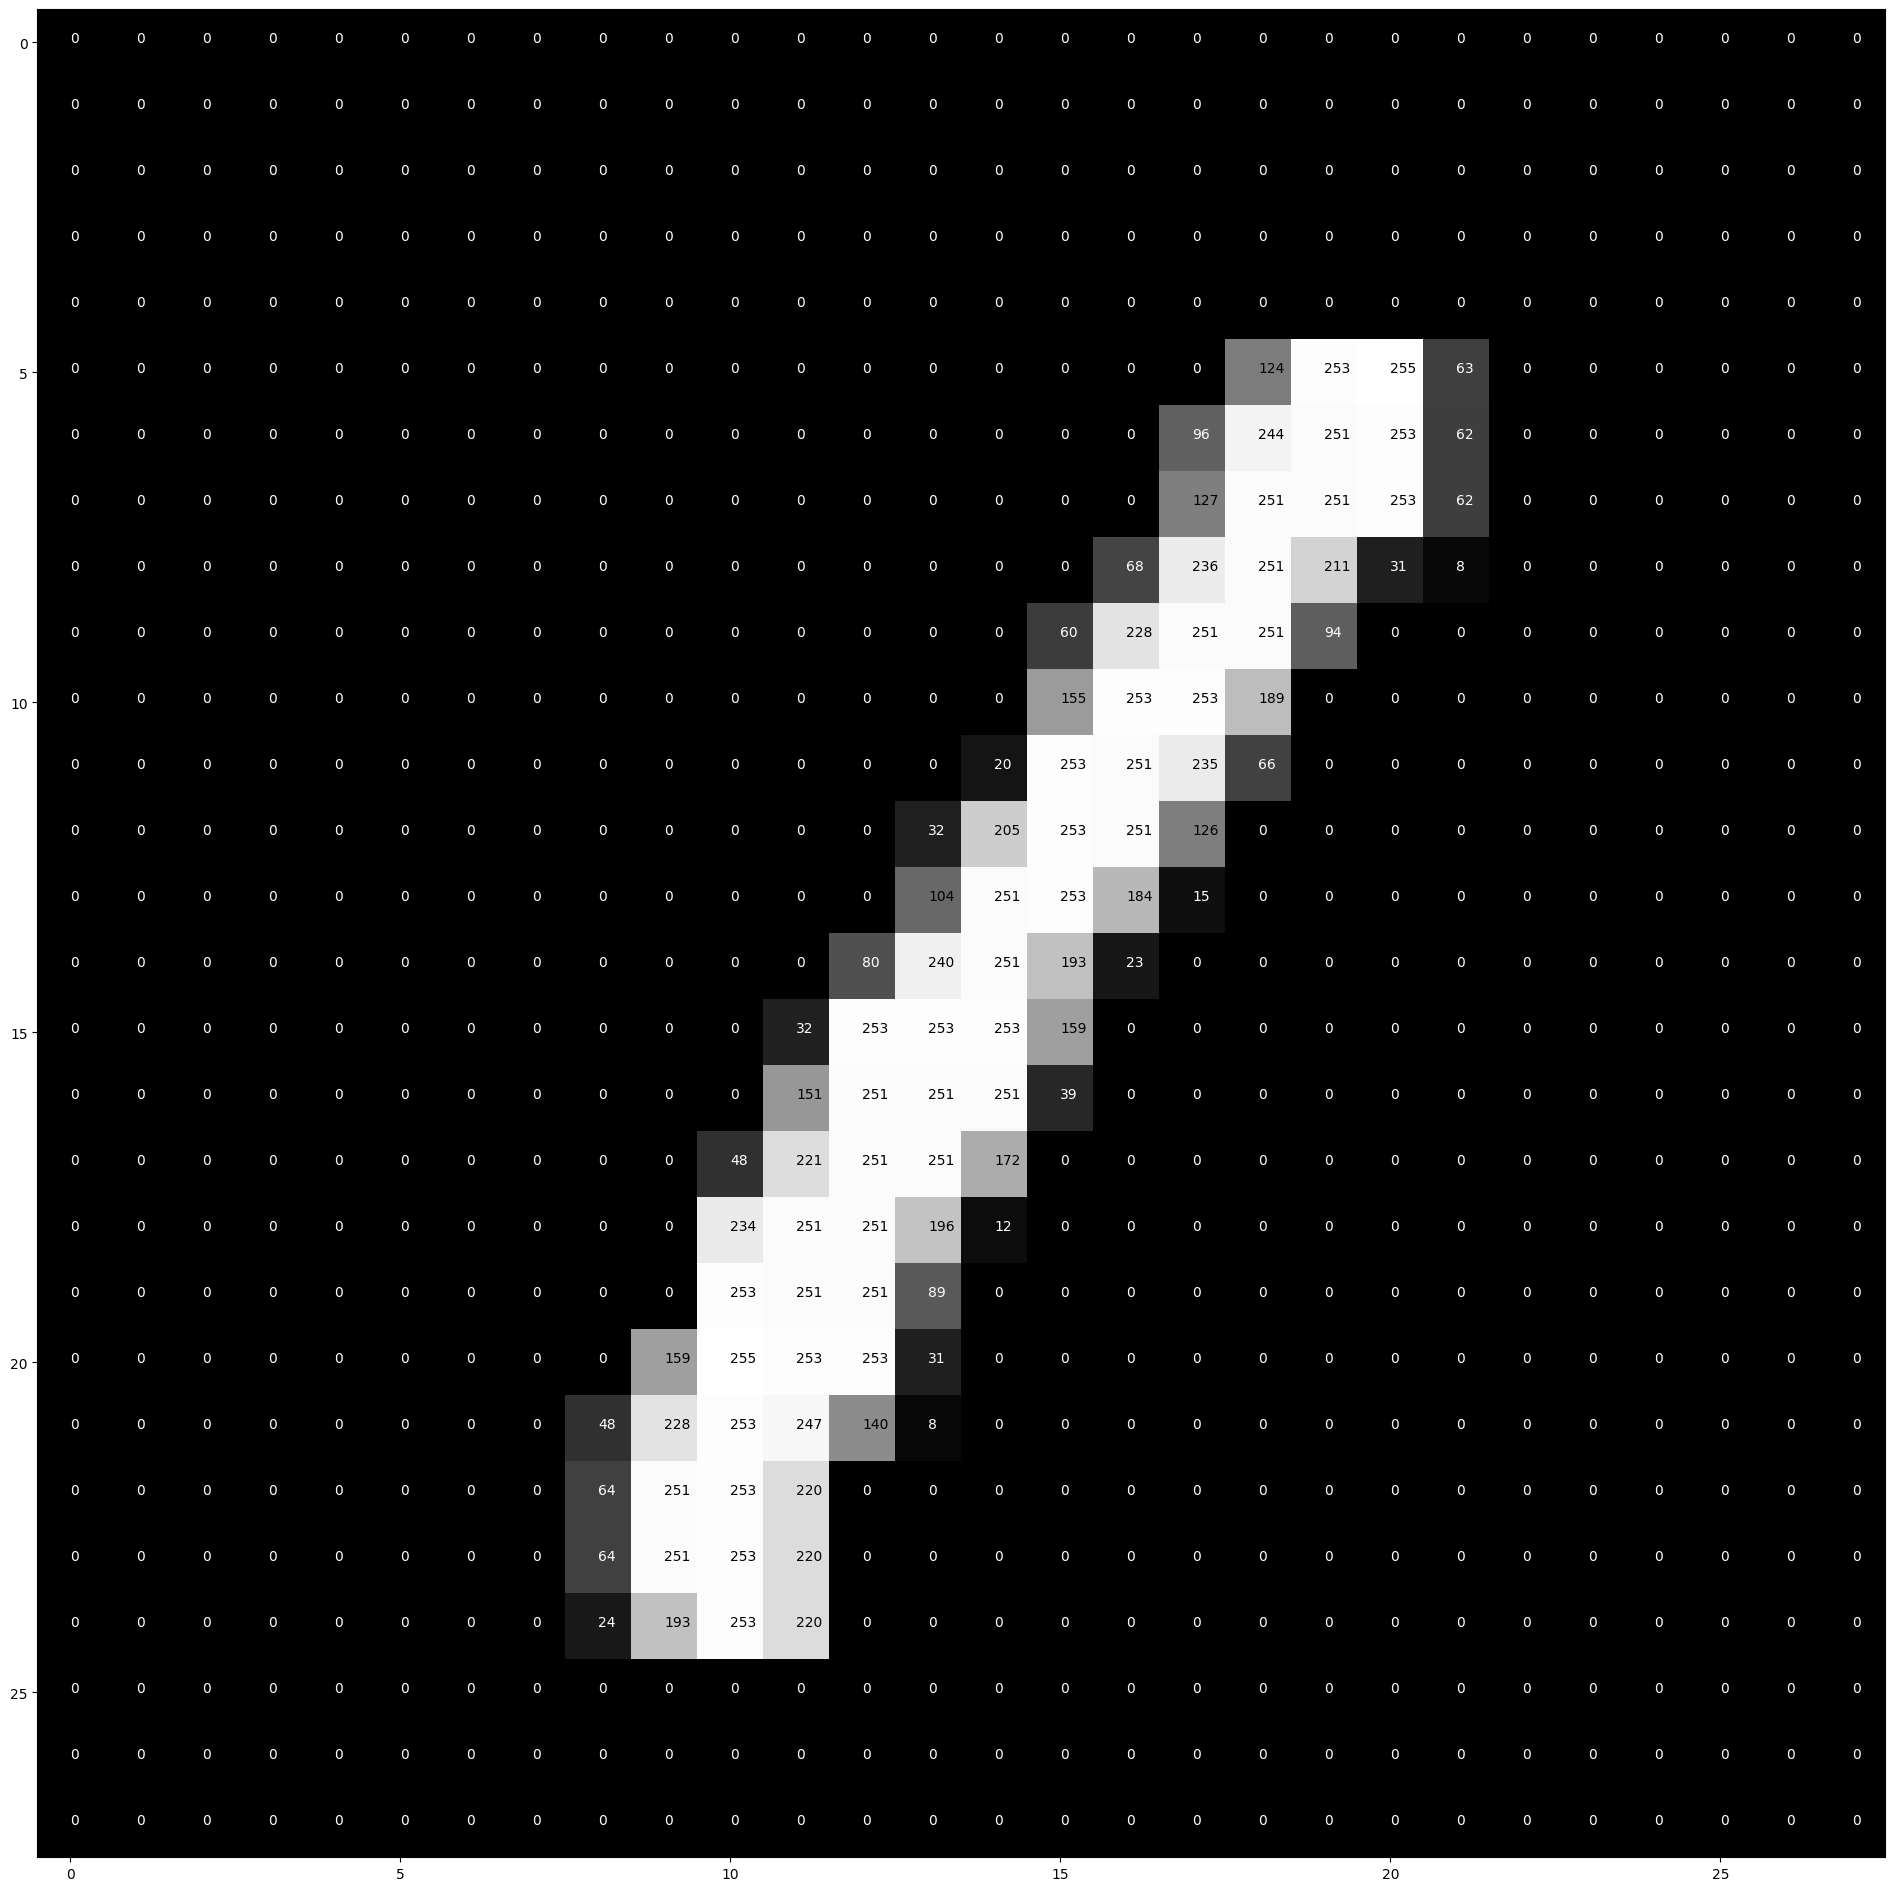

In [71]:
pixel_visualize(x_train[3])

#encoding

### for 2:
• before encode: [0 1 2 3 4 5 6 7 8 9]  
• after encode: [0 0 1 0 0 0 0 0 0 0]


In [72]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [73]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [74]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

#reshaping


In [76]:
image_size = x_train.shape[1]

In [78]:
image_size

28

In [79]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [81]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
# for keeping labels like 1,2,3,4,5,6,7,8,9,0

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
